In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
df = pd.read_csv("heart_2022_with_nans.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [5]:
df = df.dropna() 
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24602

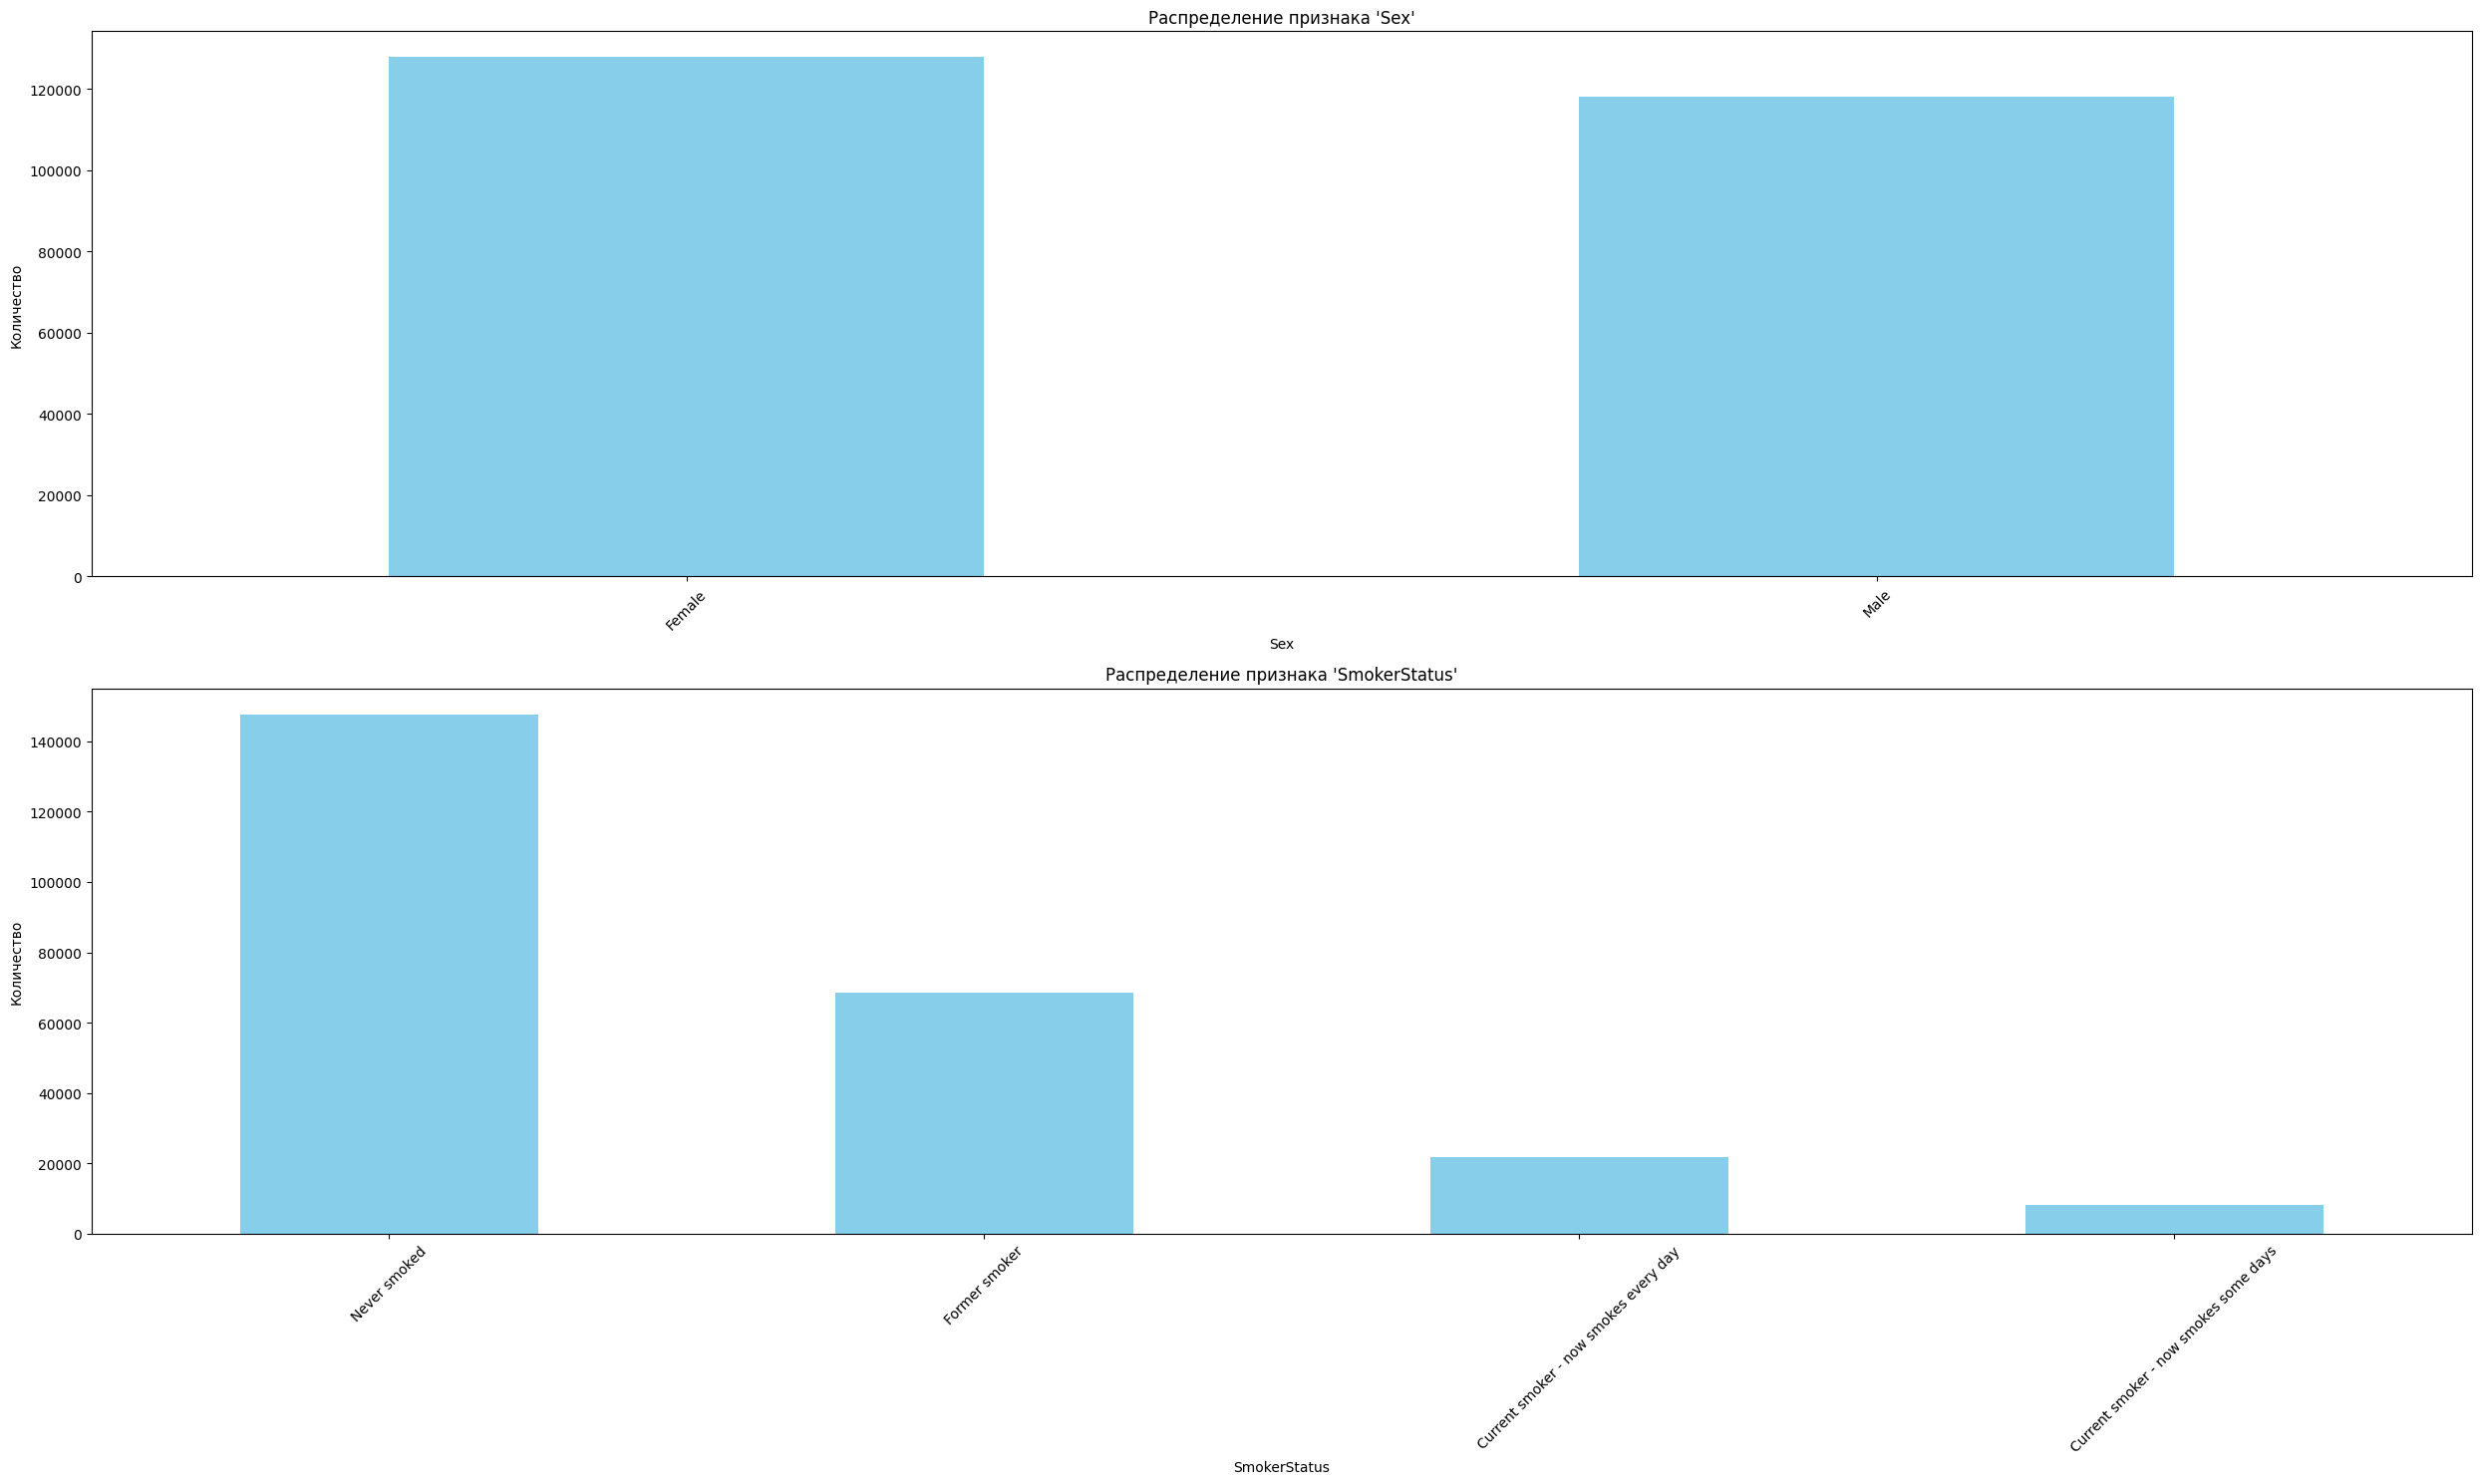

In [6]:
str_columns = ["Sex", "SmokerStatus"]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

for i, feature in enumerate(str_columns):
    category_counts = df[feature].value_counts()
    ax = axes[i]
    category_counts.plot(kind="bar", color="skyblue", ax=ax)
    ax.set_title(f"Распределение признака '{feature}'")
    ax.set_xlabel(feature)
    ax.set_ylabel("Количество")
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()

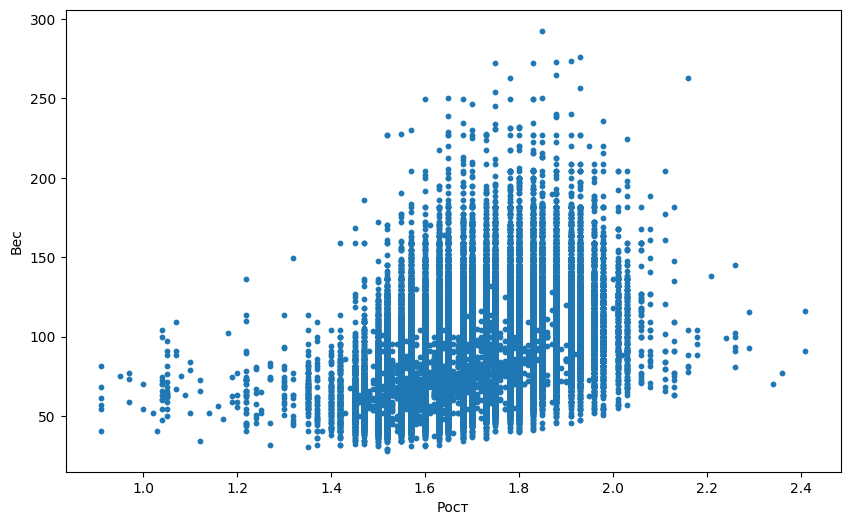

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df['HeightInMeters'], y=df['WeightInKilograms'], s=10)
plt.xlabel("Рост")
plt.ylabel("Вес")

plt.show()

Text(0, 0.5, 'Рост')

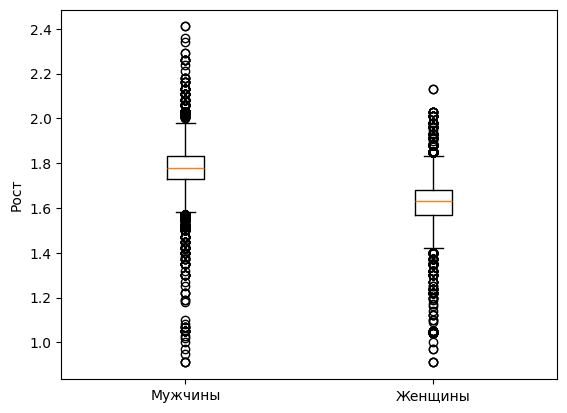

In [8]:
grouped_df = df.groupby("Sex")["HeightInMeters"].apply(list)
plt.boxplot([grouped_df["Male"], grouped_df["Female"]])
plt.xticks([1, 2], ["Мужчины", "Женщины"])
plt.ylabel("Рост")

In [9]:
num_colmuns = ["SleepHours",
               "BMI"]

str_columns = ["Sex", 
               "GeneralHealth", 
               "PhysicalActivities", 
               "CovidPos", 
                "HadKidneyDisease",
                "AlcoholDrinkers",
                "HadDiabetes",
                "SmokerStatus",
                "AgeCategory"]

selected_df = df.loc[:, list(num_colmuns + str_columns)]

scaler = preprocessing.StandardScaler()
encoder = preprocessing.LabelEncoder()
for key in str_columns:
    selected_df[key] = encoder.fit_transform(selected_df[key])
selected_df[num_colmuns + str_columns] = scaler.fit_transform(selected_df[num_colmuns + str_columns])
print(selected_df)

        SleepHours       BMI       Sex  GeneralHealth  PhysicalActivities  \
342       1.373428 -0.104105 -0.961712       1.164703            0.534726   
343      -0.708924  0.224420  1.039813       1.164703            0.534726   
345       0.679311  0.459300  1.039813       1.164703           -1.870115   
346       1.373428  0.407105 -0.961712      -0.870762            0.534726   
347      -1.403041  0.675759 -0.961712      -0.192274            0.534726   
...            ...       ...       ...            ...                 ...   
445117   -0.708924  0.554481  1.039813       1.164703            0.534726   
445123   -0.014807 -0.664440 -0.961712      -0.870762            0.534726   
445124   -0.014807  0.182971  1.039813      -0.192274            0.534726   
445128   -0.014807 -0.001249 -0.961712      -1.549251            0.534726   
445130   -1.403041  0.595930  1.039813       1.164703           -1.870115   

        CovidPos  HadKidneyDisease  AlcoholDrinkers  HadDiabetes  \
342    

Text(0.5, 1.0, 'Матрица корреляции')

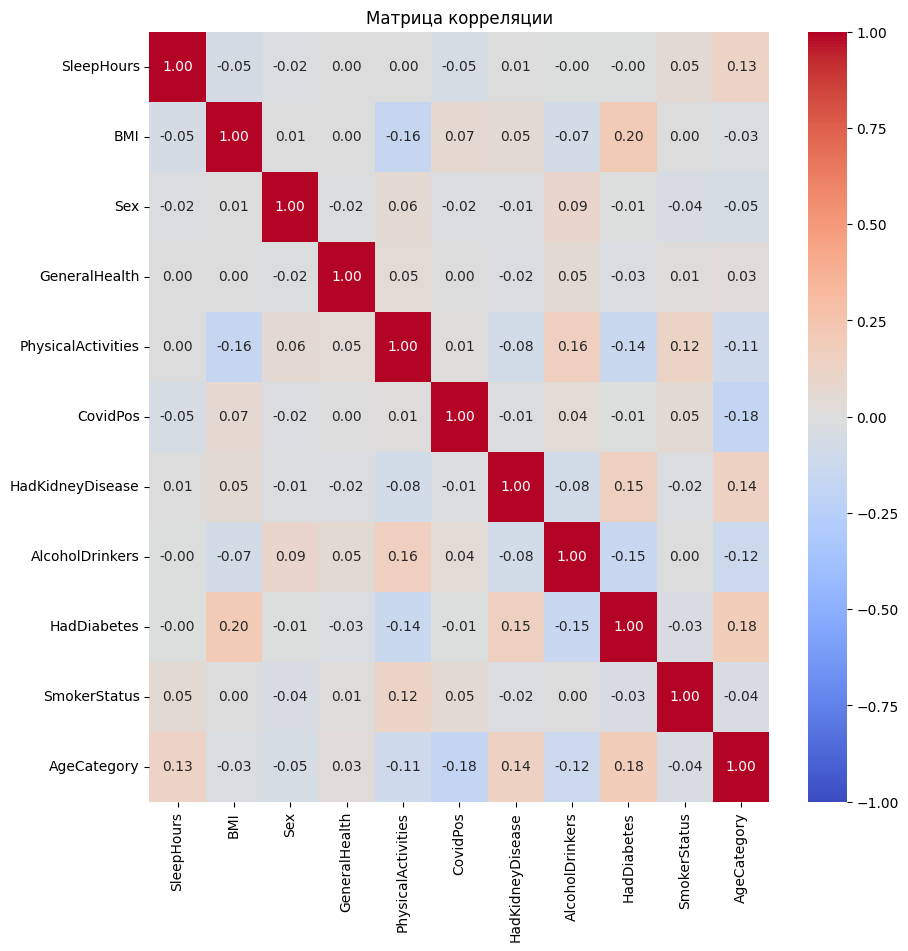

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(selected_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, center= 0)
plt.title("Матрица корреляции")